In [28]:
import importlib
import eval_functions
importlib.reload(eval_functions)
from eval_functions import *
import pandas as pd
from enum import Enum
import numpy as n

from IPython.display import display
# make tables interactive
from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True, connected=True)
opt.maxBytes=0

In [ ]:
KOFOLA="kofola-cbd2d0b"
KOFOLA_RED="kofola-red-cbd2d0b"
KOFOLA_TELA="kofola-tela-cbd2d0b"
KOFOLA_TELA_RED="kofola-tela-red-cbd2d0b"
SPOT="spot-2.11.2"
SPOT_RED="spot-red-2.11.2"

# Timeout (in seconds) 
TIMEOUT=120


TOOLS = list(dict.fromkeys([ # small hack so that we get list of unique values (i.e. a set, but also in the given order; see https://stackoverflow.com/questions/1653970/does-python-have-an-ordered-set)
    KOFOLA,
    KOFOLA_RED,
    KOFOLA_TELA,
    KOFOLA_TELA_RED,
    SPOT,
    SPOT_RED,

    # you can add more tools here directly if needed
]))

BENCHES = [
  #"s1s_direct_red",
  "tela_determinisation_elevator",
]

In [30]:
df_all = load_benches(BENCHES, TOOLS, TIMEOUT) # last parameter is timeout

KeyError: "['kofola-c0542f1-runtime', 'kofola-red-c0542f1-runtime'] not in index"

## Evaluation

In [22]:
print(simple_table(df_all, TOOLS, BENCHES, separately=False))
print(simple_table(df_all, TOOLS, BENCHES, separately=True))

# of automata: 61
----------------------------------------------------------------------------------------------------
tool                       ✅    ❌    states    max-states    states-avg    states-med    time    time-avg    time-med    TO
-----------------------  ----  ----  --------  ------------  ------------  ------------  ------  ----------  ----------  ----
kofola-tela-cbd2d0b        61     0  10721.00       3224.00        175.75         12.00    2.75        0.05        0.02     0
kofola-tela-red-cbd2d0b    61     0  10678.00       3224.00        175.05         12.00    3.72        0.06        0.02     0
spot-2.11.2                61     0  38884.00      12563.00        637.44         17.00    0.97        0.02        0.01     0
spot-red-2.11.2            61     0  10642.00       3224.00        174.46         11.00    1.86        0.03        0.01     0
----------------------------------------------------------------------------------------------------


Benchmark tela_determini

In [25]:
TOOL_FOR_COMPARISON = KOFOLA_TELA_RED

### States

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.


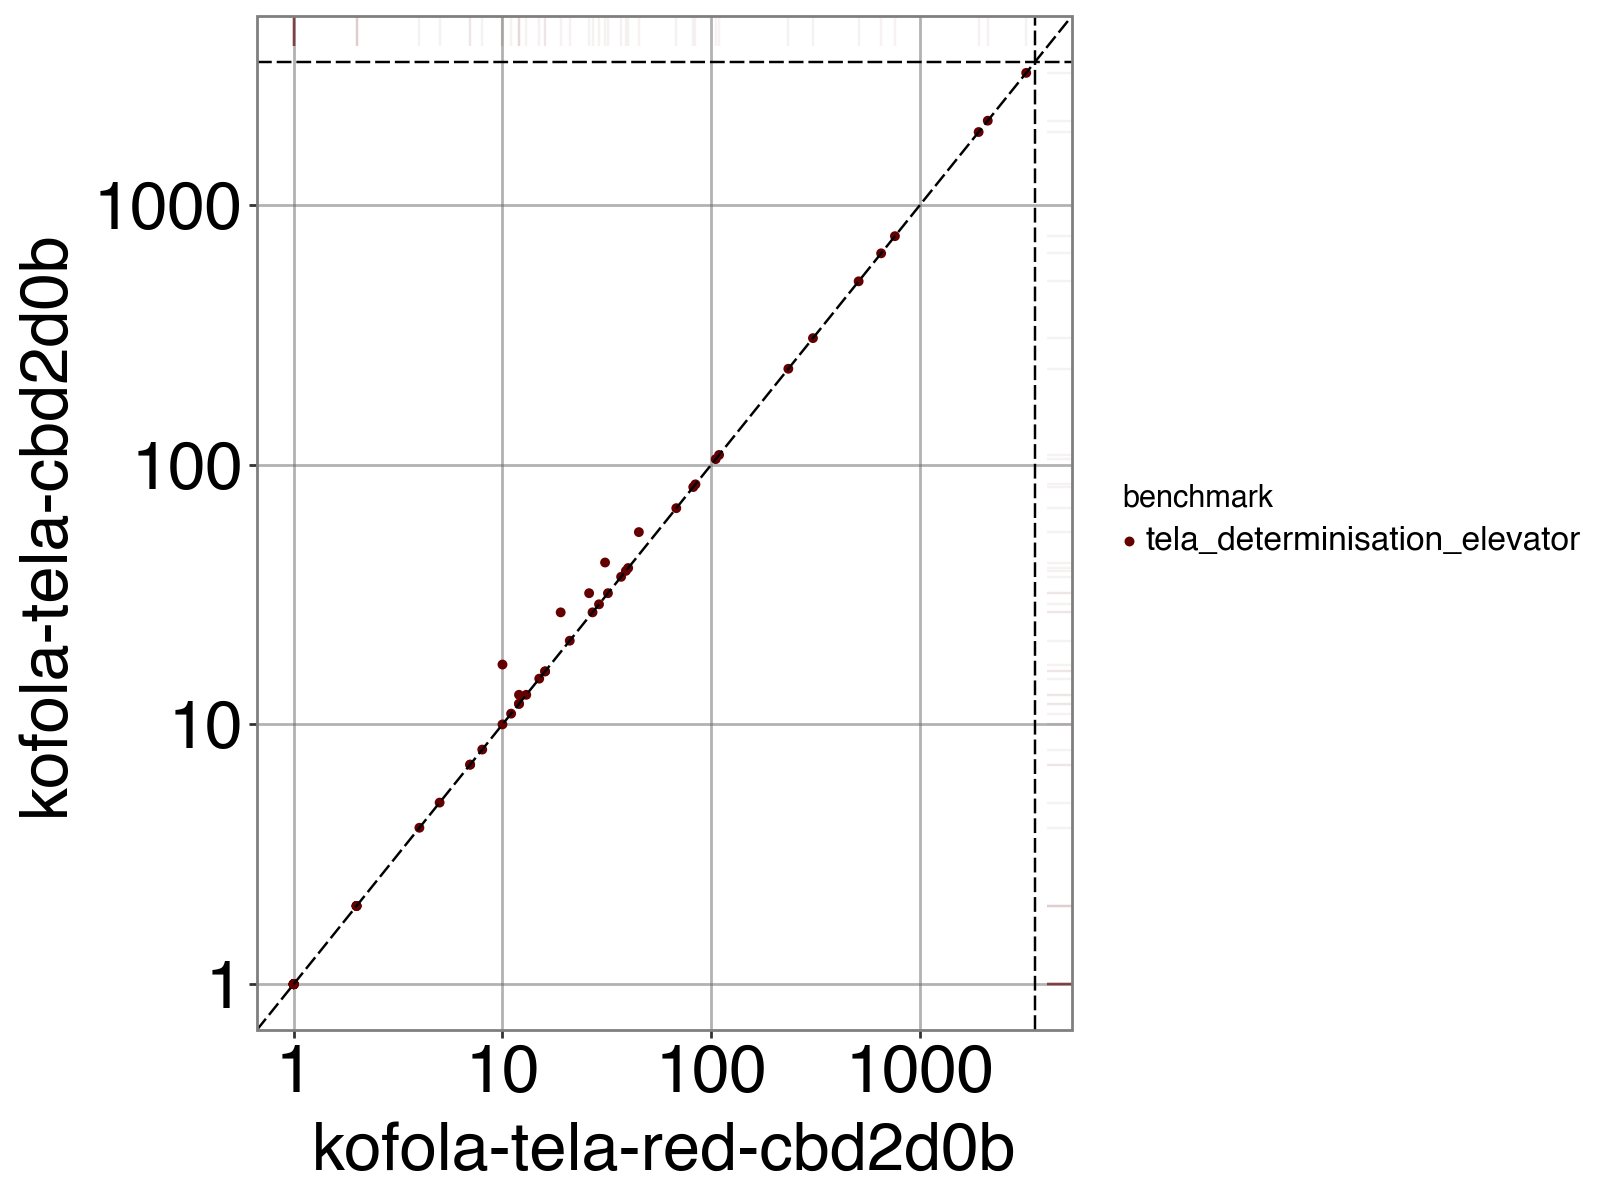

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.


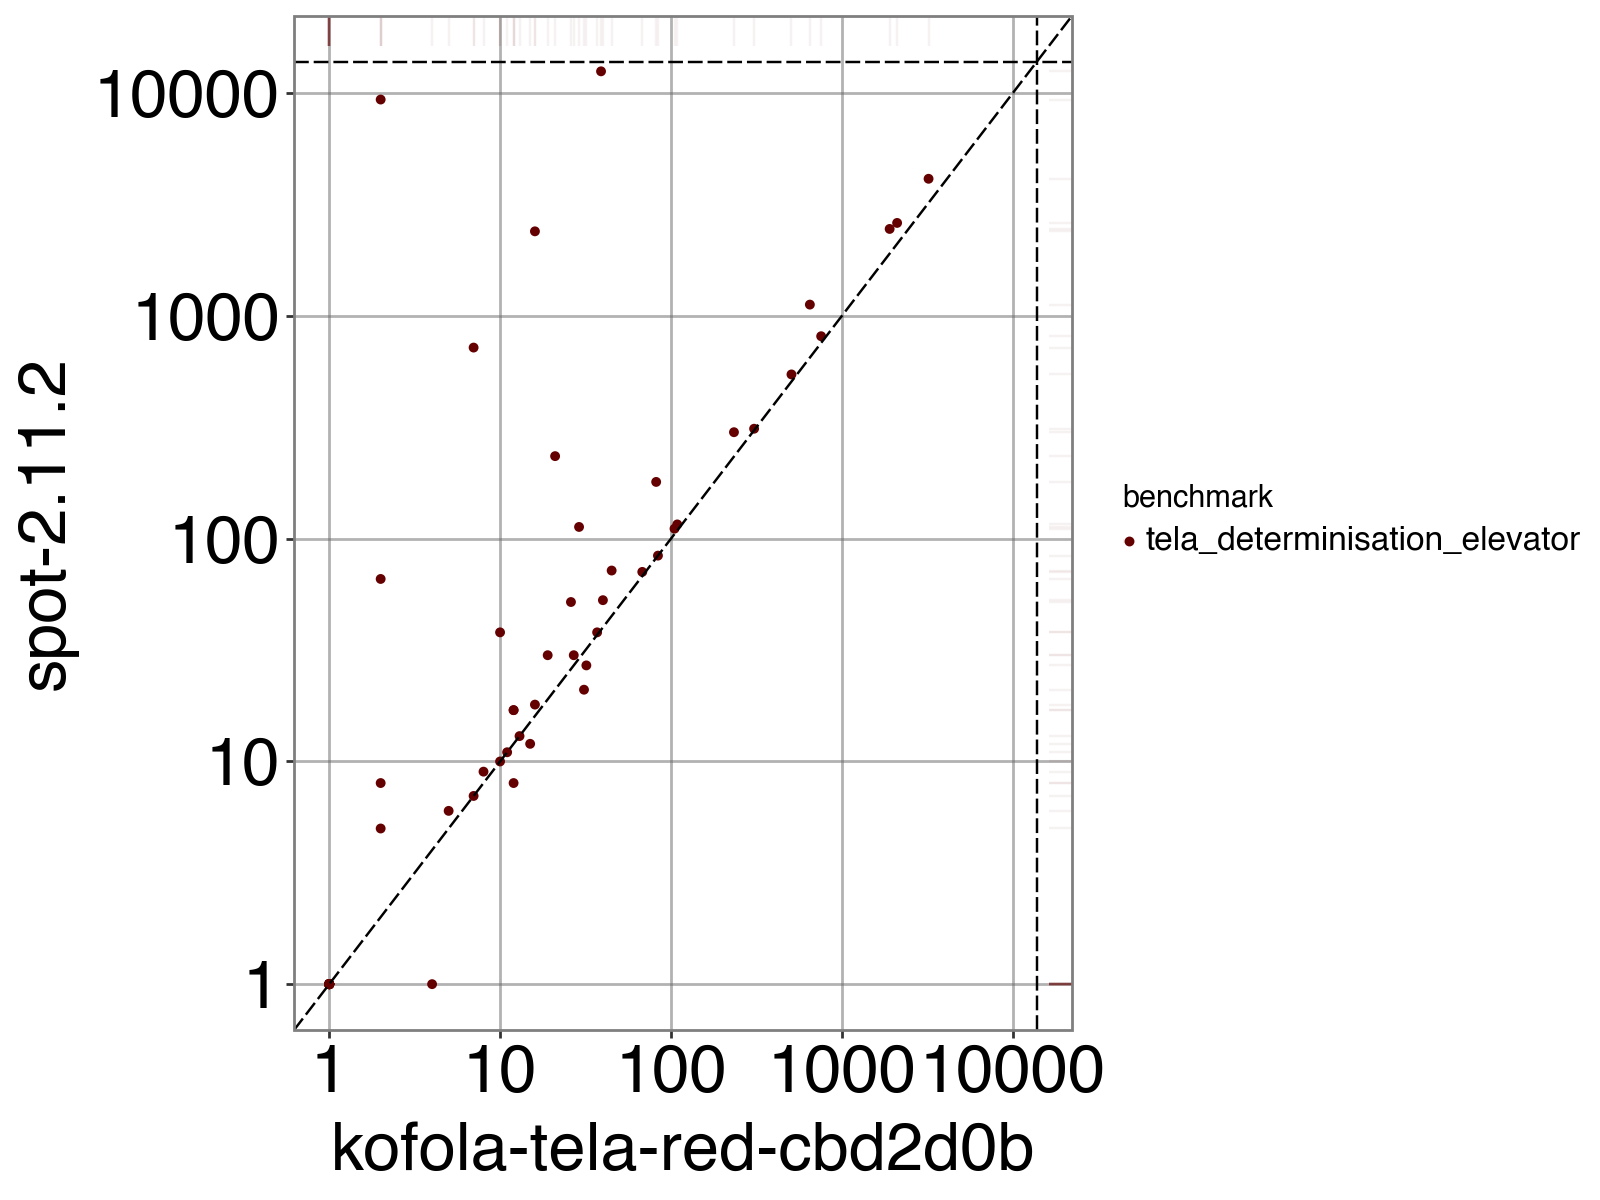

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.


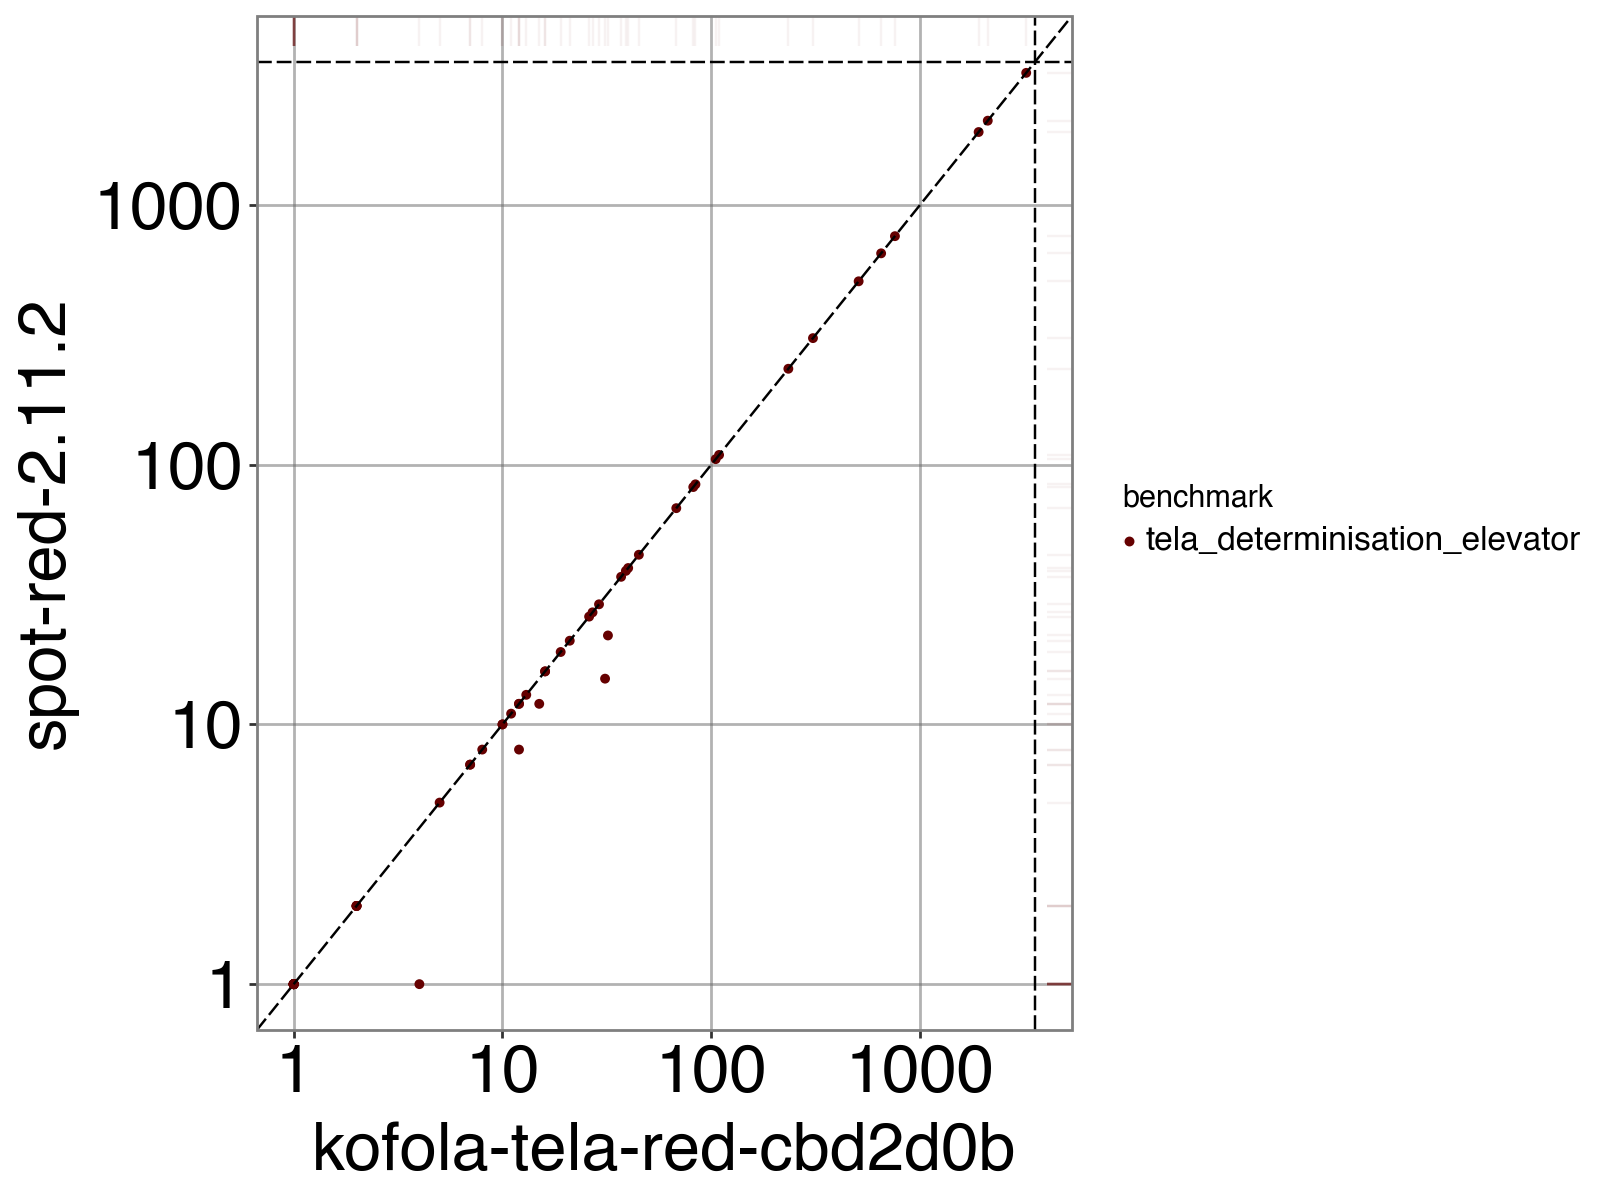

In [26]:
for tool in TOOLS:
    if tool != TOOL_FOR_COMPARISON:
        display(scatter_plot_states(df_all, TOOL_FOR_COMPARISON, tool, color_column="benchmark", clamp=False))

### Time

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.


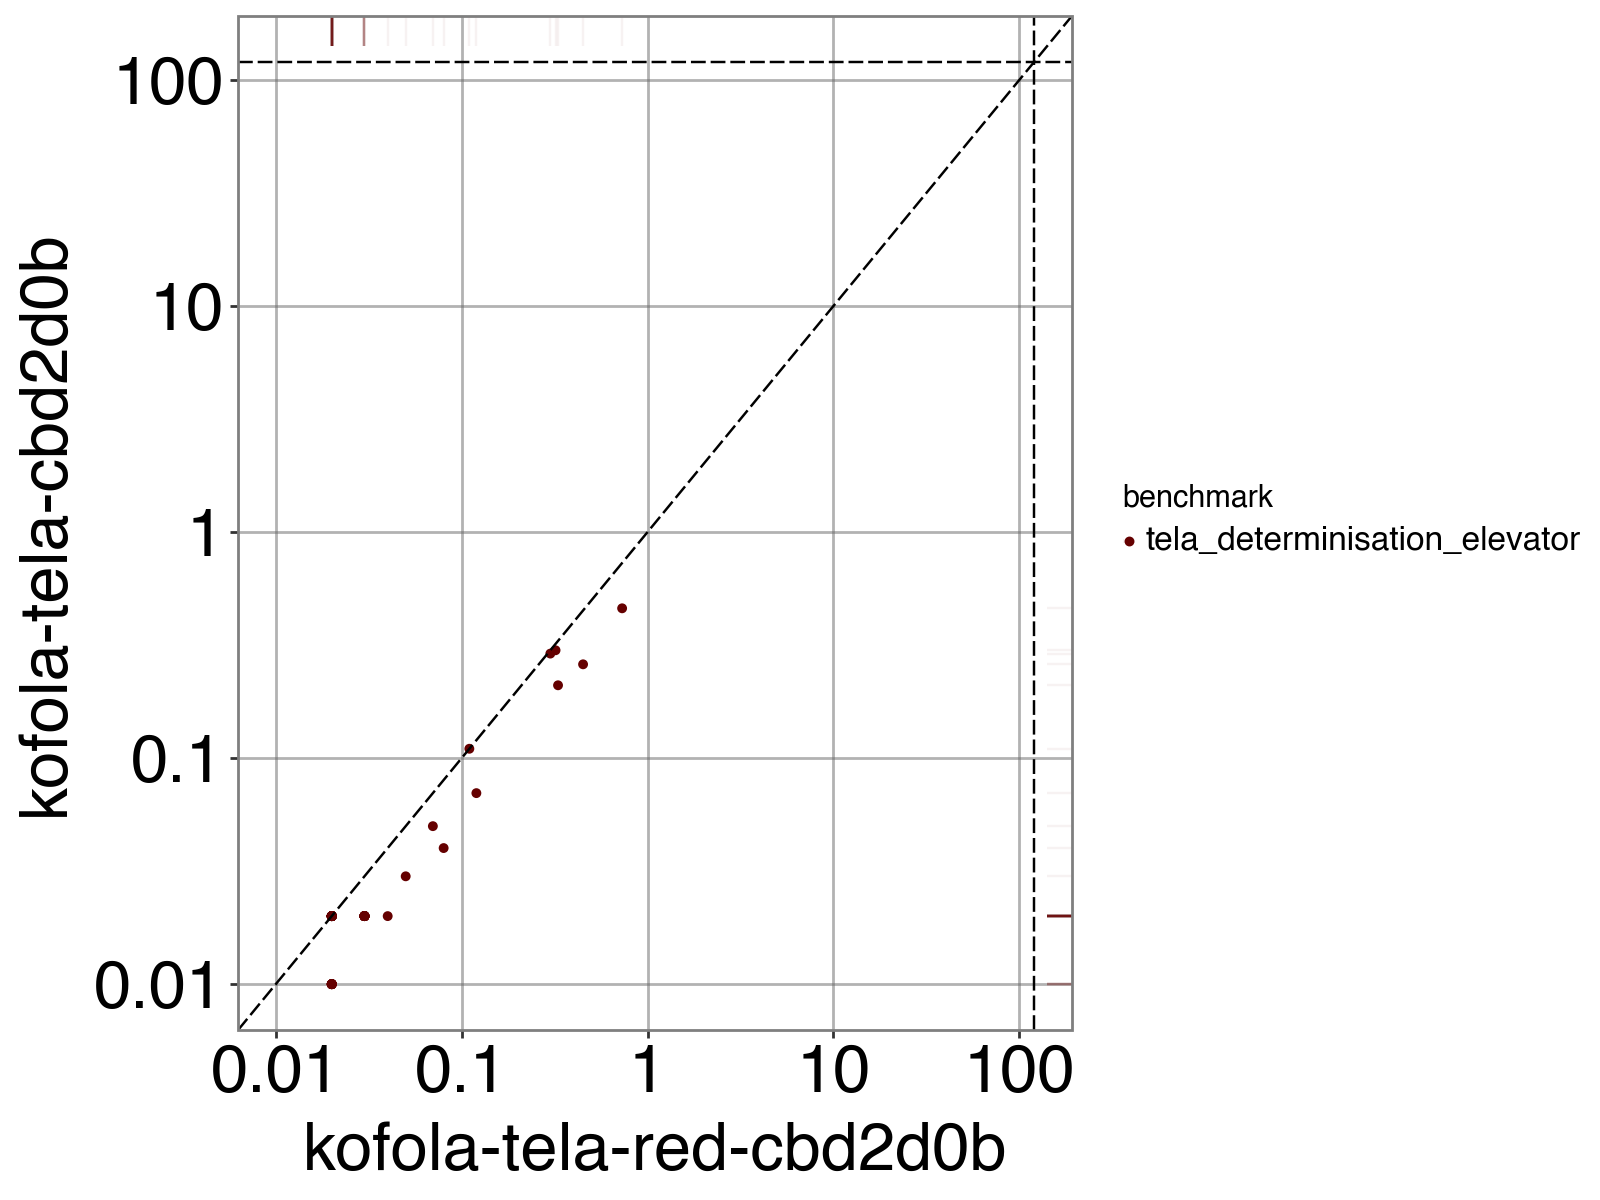

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.


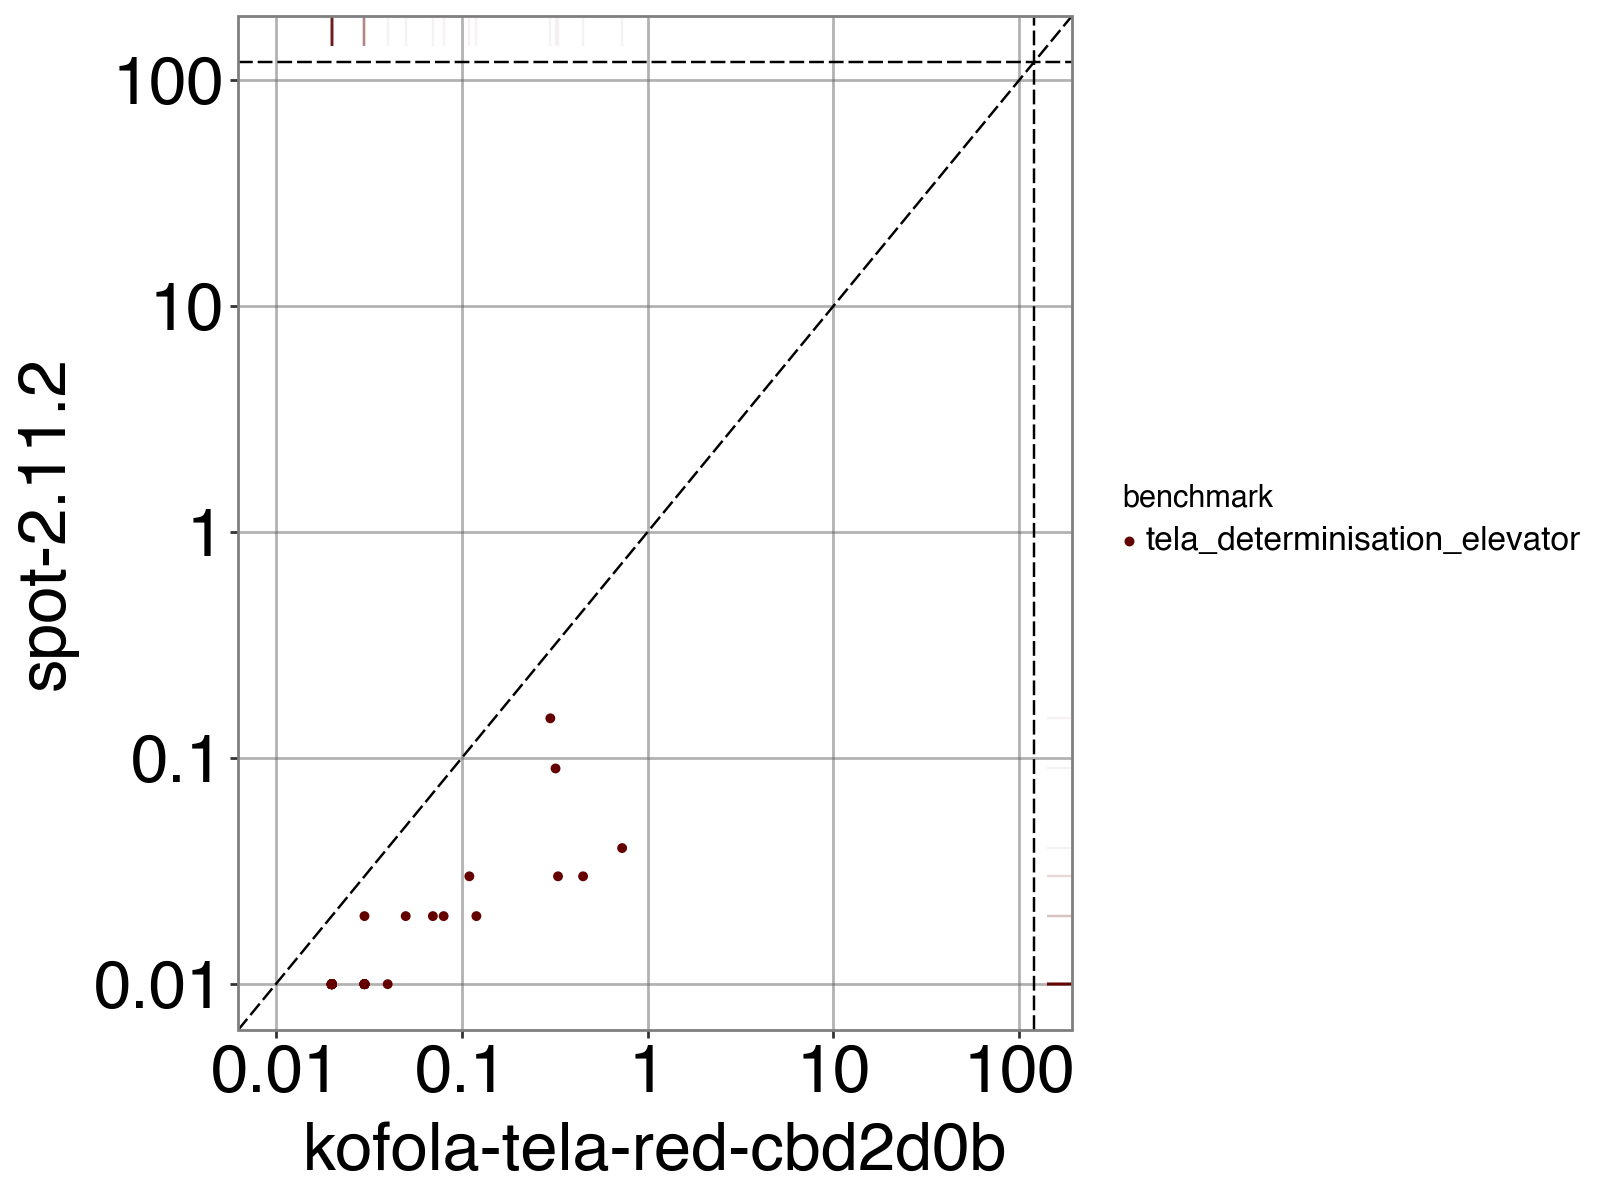

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.


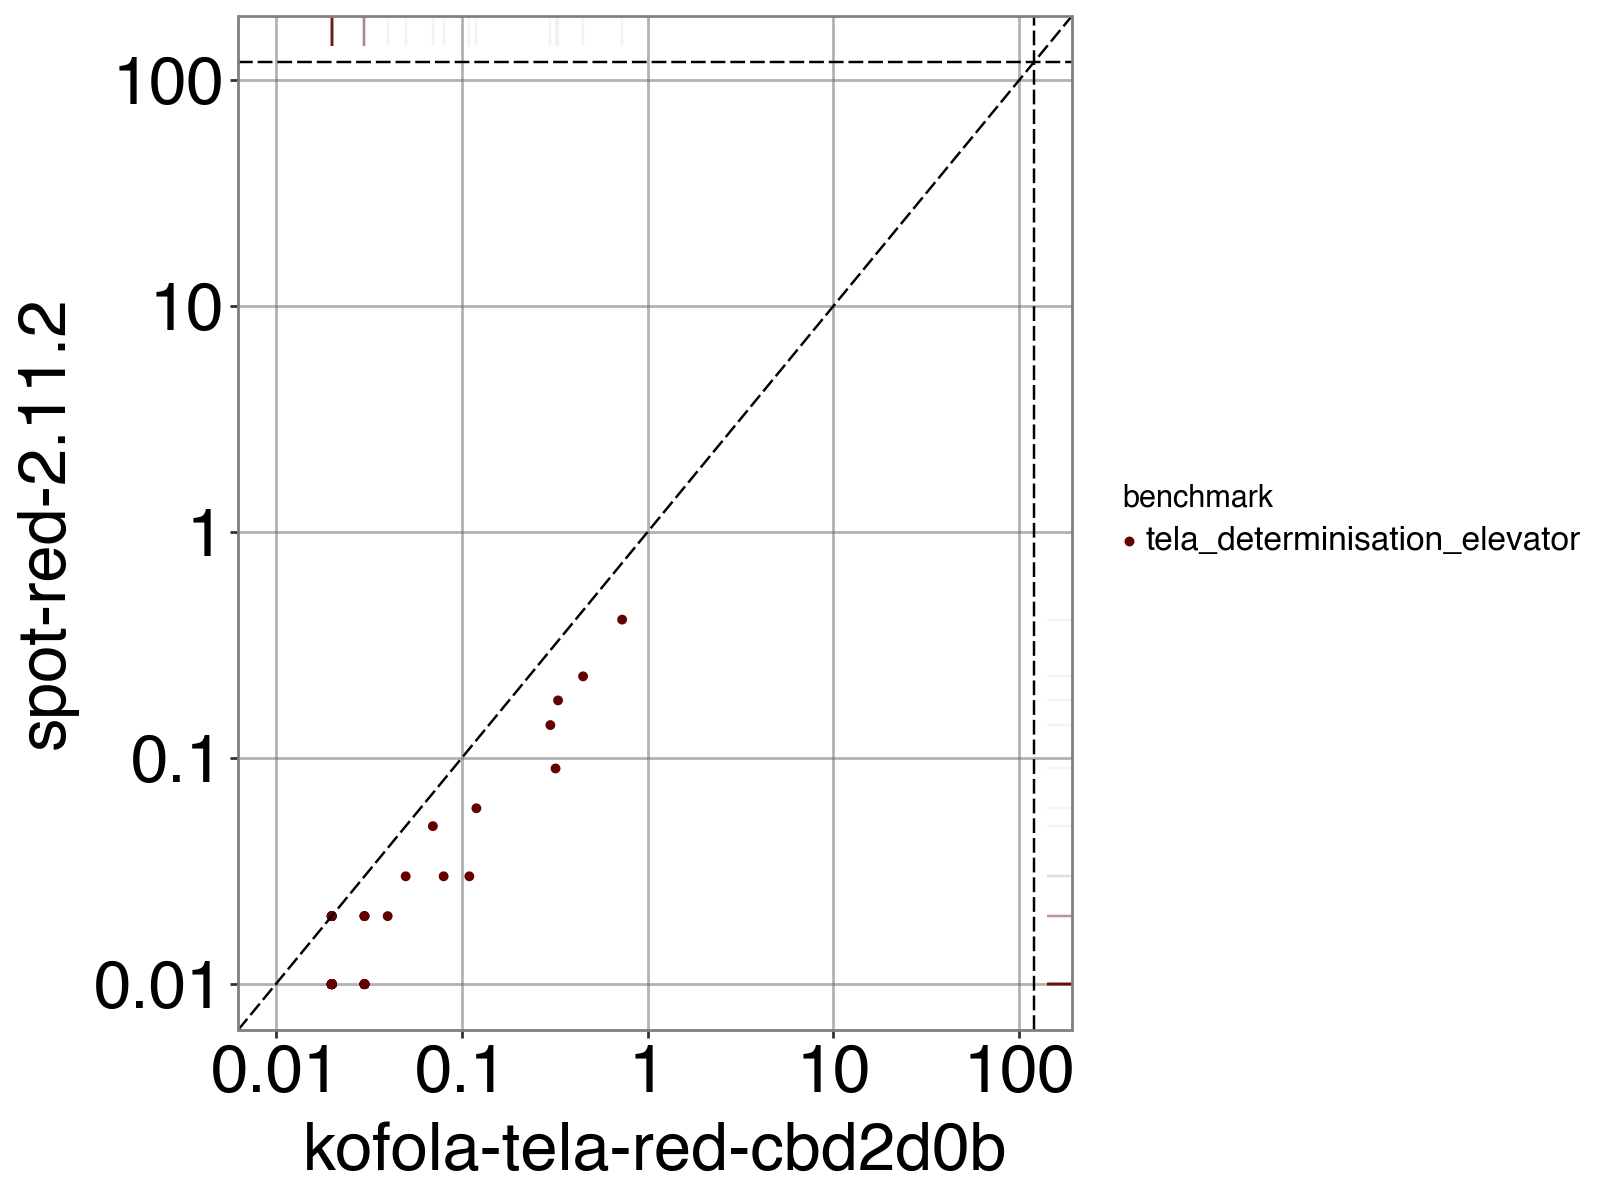

In [27]:
for tool in TOOLS:
    if tool != TOOL_FOR_COMPARISON:
        display(scatter_plot(df_all, TOOL_FOR_COMPARISON, tool, color_column="benchmark", timeout=TIMEOUT))